## Python Libraries

In [2]:
!pip install pandas numpy matplotlib seaborn requests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('daily_aqi_by_county_2024.csv' , engine='python', sep=',', quotechar='"', on_bad_lines='skip')

In [6]:
df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2024-01-03,41,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2024-01-04,38,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2024-01-05,44,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2024-01-06,7,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2024-01-07,29,Good,PM2.5,01-003-0010,1


In [7]:
df.shape

(327123, 10)

In [9]:
df['State Name'].unique()[:20]   # first 20 states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana'],
      dtype=object)

In [10]:
df['county Name'].unique()[:20]  # first 20 counties

array(['Baldwin', 'Clay', 'DeKalb', 'Elmore', 'Etowah', 'Jefferson',
       'Lawrence', 'Madison', 'Mobile', 'Montgomery', 'Morgan', 'Russell',
       'Shelby', 'Sumter', 'Tuscaloosa', 'Aleutians East ', 'Anchorage ',
       'Denali ', 'Fairbanks North Star ', 'Juneau '], dtype=object)

In [11]:
print("Columns:", df.columns.tolist())

Columns: ['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI', 'Category', 'Defining Parameter', 'Defining Site', 'Number of Sites Reporting']


In [12]:
print("\nData types:")
df.dtypes


Data types:


State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object

In [14]:
print("\nMissing values per column:")
df.isna().sum()


Missing values per column:


State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [15]:
df.sample(5)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
156213,Missouri,Lincoln,29,113,2024-06-27,50,Good,Ozone,29-113-0004,1
185101,New York,Bronx,36,5,2024-10-11,26,Good,Ozone,36-005-0110,4
202132,North Carolina,Northampton,37,131,2024-09-07,35,Good,PM2.5,37-131-0003,1
315411,Wisconsin,Jefferson,55,55,2024-08-24,61,Moderate,Ozone,55-055-0009,1
196380,North Carolina,Davidson,37,57,2024-07-20,23,Good,PM2.5,37-057-0002,1


In [16]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [17]:
df.sample(5)

,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
236448,Pennsylvania,Bucks,42,17,2024-03-09,35,Good,Ozone,42-017-0012,1
237798,Pennsylvania,Chester,42,29,2024-11-30,34,Good,PM2.5,42-029-0100,1
208611,Ohio,Athens,39,9,2024-03-24,15,Good,PM2.5,39-009-0003,1
279361,Texas,Rockwall,48,397,2024-04-02,33,Good,Ozone,48-397-0001,1
195137,North Carolina,Carteret,37,31,2024-10-06,45,Good,Ozone,37-031-9991,1


### Datetime Dtype

In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df['aqi'] = pd.to_numeric(df['aqi'], errors='coerce')

### Na Values Filling

In [19]:
df['county_code'] = df['county_code'].fillna(0).astype(int)

In [20]:
df['number_of_sites_reporting'] = df['number_of_sites_reporting'].fillna(0).astype(int)

In [21]:
df['category'] = df['category'].fillna("Unknown")

In [22]:
df['defining_parameter'] = df['defining_parameter'].fillna("Unknown")

In [23]:
df['defining_site'] = df['defining_site'].fillna("Unknown")

In [25]:
df['aqi'] = df['aqi'].fillna(df['aqi'].median())

In [26]:
print("Data after cleaning:")
print(df.dtypes)
print(df.isna().sum())

Data after cleaning:
state_name                           object
county_name                          object
state_code                            int64
county_code                           int64
date                         datetime64[ns]
aqi                                   int64
category                             object
defining_parameter                   object
defining_site                        object
number_of_sites_reporting             int64
dtype: object
state_name                   0
county_name                  0
state_code                   0
county_code                  0
date                         0
aqi                          0
category                     0
defining_parameter           0
defining_site                0
number_of_sites_reporting    0
dtype: int64


In [ ]:
df.head()

,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
0,Alabama,Baldwin,1,3,2024-01-03,41.0,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2024-01-04,38.0,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2024-01-05,44.0,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2024-01-06,7.0,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2024-01-07,29.0,Good,PM2.5,01-003-0010,1


In [27]:
df = df.dropna(subset=['date'])
print("Shape:", df.shape)

Shape: (327123, 10)


In [ ]:
print("\nDate range:", df['date'].min(), "to", df['date'].max())
print("\nUnique states:", df['state_name'].nunique())
print("Unique counties:", df['county_name'].nunique())

In [28]:
print("\nAQI Summary:")
print(df['aqi'].describe())
print("\nTop AQI Categories:")
print(df['category'].value_counts())


AQI Summary:
count    327123.000000
mean         41.822116
std          19.656572
min           0.000000
25%          31.000000
50%          40.000000
75%          51.000000
max        1513.000000
Name: aqi, dtype: float64

Top AQI Categories:
category
Good                              242891
Moderate                           80219
Unhealthy for Sensitive Groups      3278
Unhealthy                            627
Very Unhealthy                        83
Hazardous                             25
Name: count, dtype: int64


In [29]:
df['state_name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [30]:
state_choice = "Arizona"
county_choice = "Maricopa"

df_city = df[(df['state_name'] == state_choice) &
             (df['county_name'] == county_choice)].copy()

In [31]:
print("Filtered dataset shape:", df_city.shape)
print("Date range:", df_city['date'].min(), "to", df_city['date'].max())
print(df_city['category'].value_counts())
df_city.head()

Filtered dataset shape: (366, 10)
Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00
category
Moderate                          260
Unhealthy for Sensitive Groups     65
Good                               33
Unhealthy                           7
Very Unhealthy                      1
Name: count, dtype: int64


,state_name,county_name,state_code,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
8739,Arizona,Maricopa,4,13,2024-01-01,261,Very Unhealthy,PM2.5,04-013-0019,30
8740,Arizona,Maricopa,4,13,2024-01-02,80,Moderate,PM2.5,04-013-4003,30
8741,Arizona,Maricopa,4,13,2024-01-03,59,Moderate,PM2.5,04-013-4003,30
8742,Arizona,Maricopa,4,13,2024-01-04,38,Good,Ozone,04-013-9508,30
8743,Arizona,Maricopa,4,13,2024-01-05,64,Moderate,PM2.5,04-013-9812,30


# Plots

### Distribution Plots

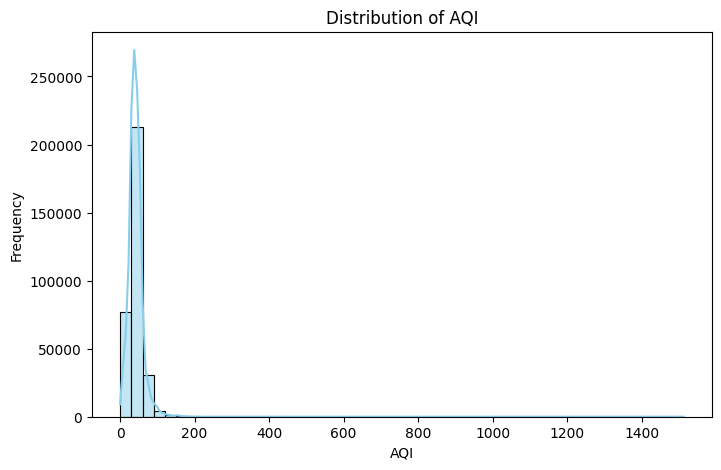

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df["aqi"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

### AQI Categories Count

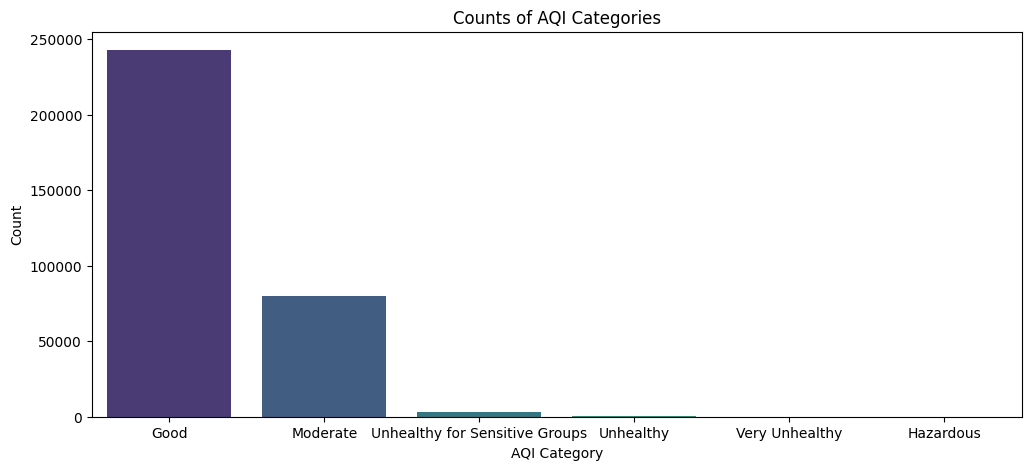

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="category", order=df["category"].value_counts().index, palette="viridis")
plt.title("Counts of AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()

### Distribution of Defining Parameters (Pollutants)

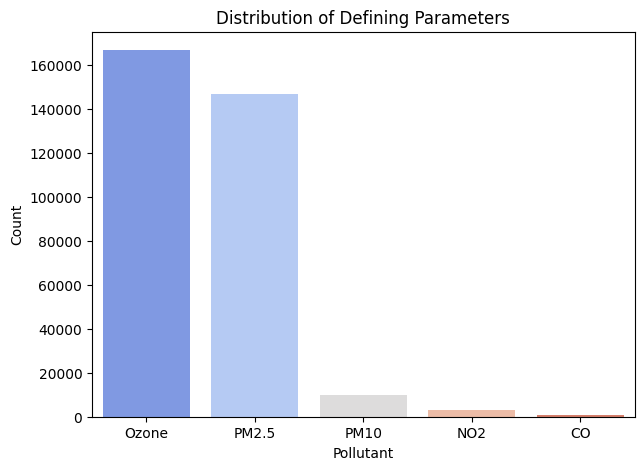

In [89]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="defining_parameter", order=df["defining_parameter"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Defining Parameters")
plt.xlabel("Pollutant")
plt.ylabel("Count")
plt.show()

## Trends

### Average AQI Over Time (Monthly Trend)

In [50]:
# Create a Month Column to check Trends over Months
df["month"] = df["date"].dt.to_period("M")

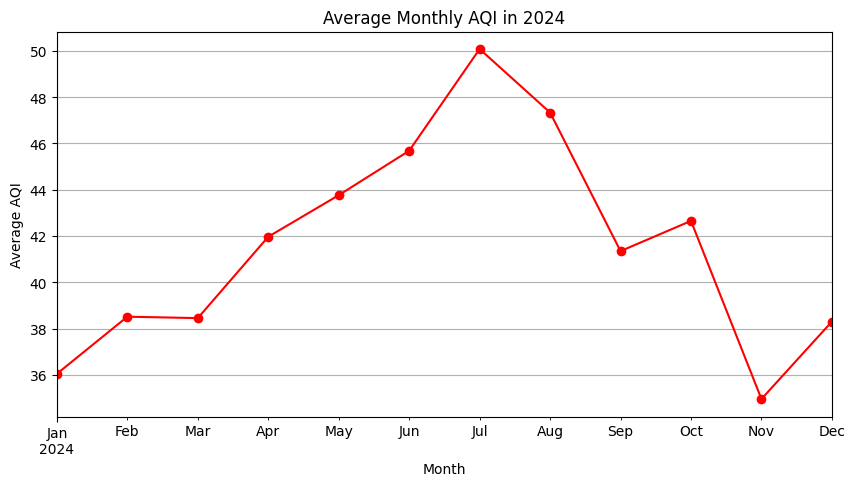

In [51]:
monthly_aqi = df.groupby("month")["aqi"].mean()

plt.figure(figsize=(10,5))
monthly_aqi.plot(marker="o", color="red")
plt.title("Average Monthly AQI in 2024")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

In [52]:
## Highest in July and Lowest in May

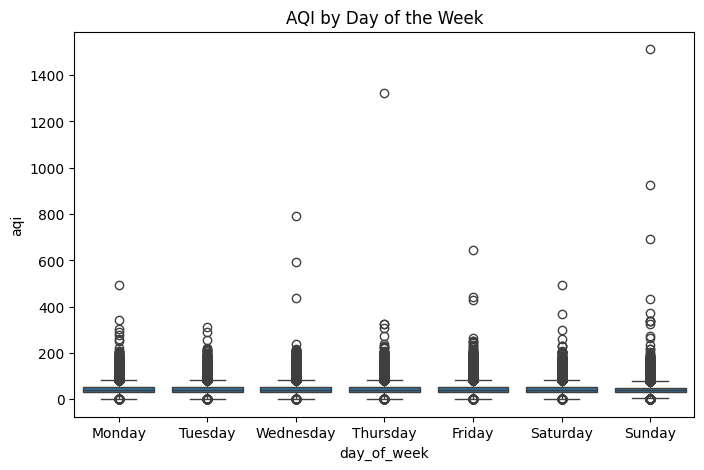

In [67]:
df["day_of_week"] = df["date"].dt.day_name()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="day_of_week", y="aqi", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("AQI by Day of the Week")
plt.show()

### States with Highest AQI

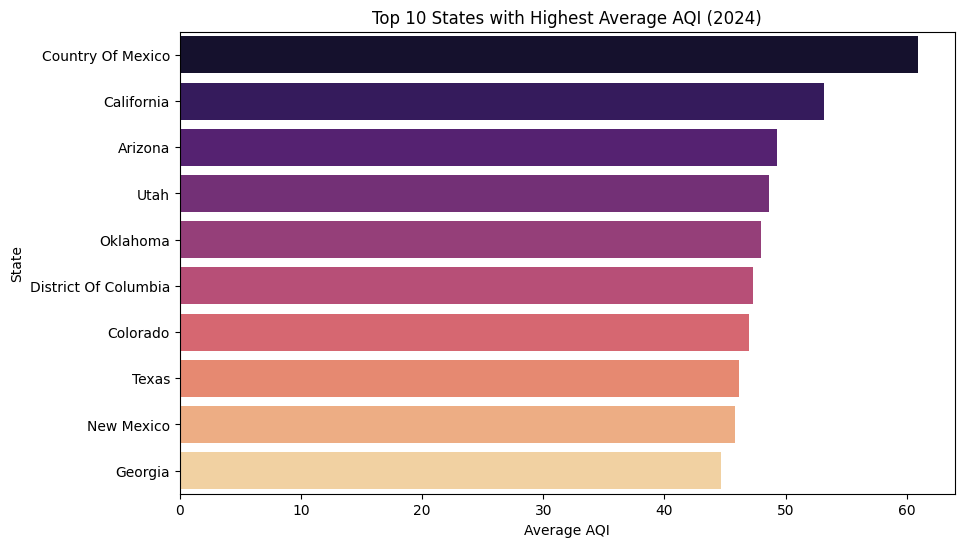

In [55]:
state_aqi = df.groupby("state_name")["aqi"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_aqi.values, y=state_aqi.index, palette="magma")
plt.title("Top 10 States with Highest Average AQI (2024)")
plt.xlabel("Average AQI")
plt.ylabel("State")
plt.show()

### Average AQI due to Pollutants

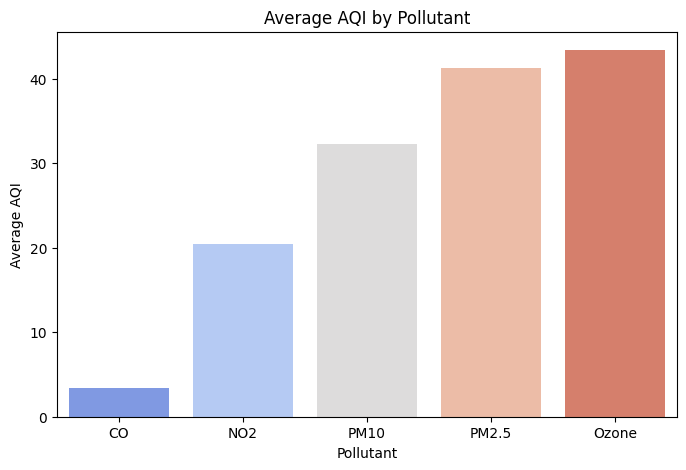

In [79]:
pollutant_aqi = df.groupby("defining_parameter")["aqi"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=pollutant_aqi.index, y=pollutant_aqi.values, palette="coolwarm")
plt.title("Average AQI by Pollutant")
plt.xlabel("Pollutant")
plt.ylabel("Average AQI")
plt.show()

### Category Trends Over Time

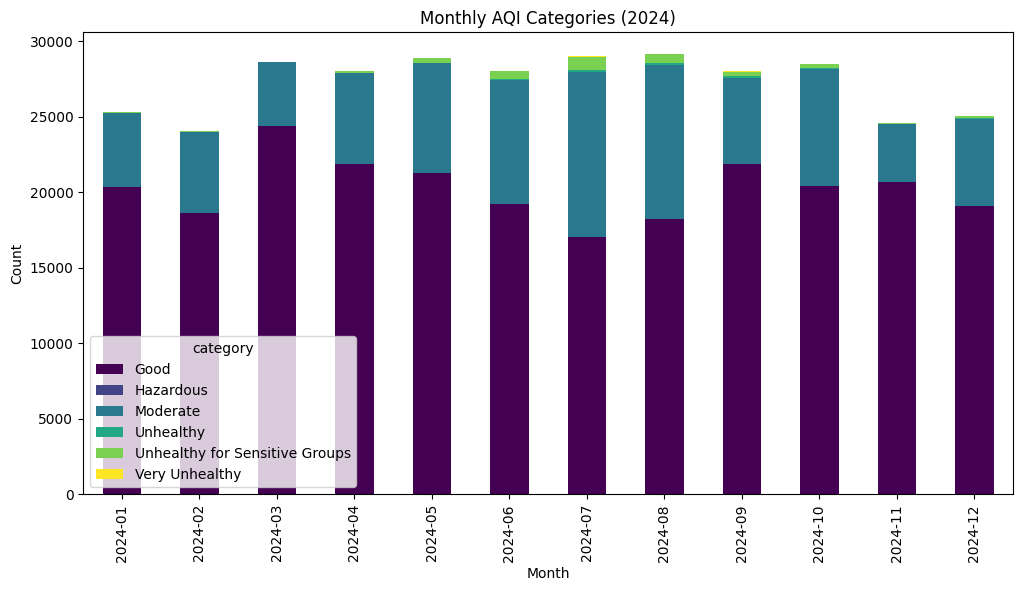

In [65]:
monthly_cat = df.groupby([df["month"], "category"]).size().unstack()

monthly_cat.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
plt.title("Monthly AQI Categories (2024)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

### Outlier Detection

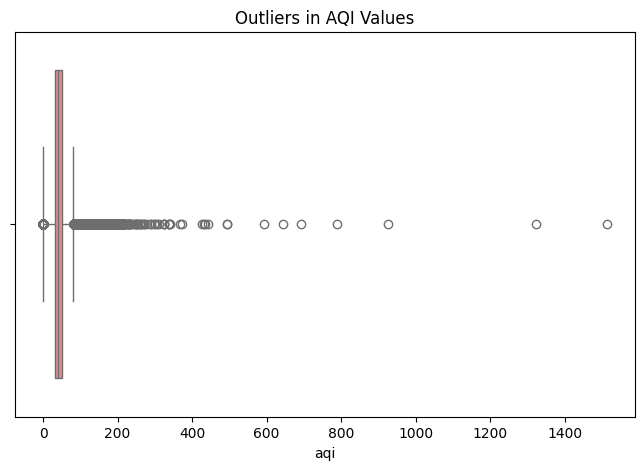

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["aqi"], color="lightcoral")
plt.title("Outliers in AQI Values")
plt.show()

### State-wise AQI Distribution

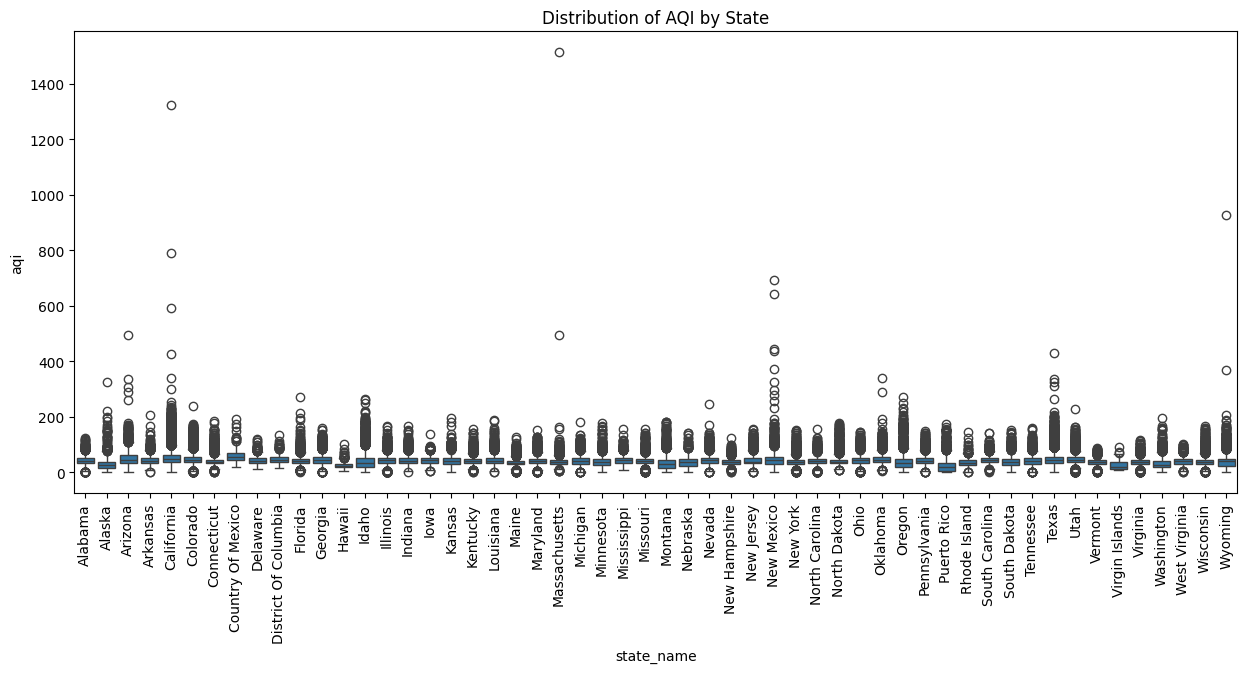

In [61]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="state_name", y="aqi")
plt.xticks(rotation=90)
plt.title("Distribution of AQI by State")
plt.show()

### Correlations

In [85]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Numerical columns:", num_cols, end='\n\n')

# Correlation matrix


Numerical columns: ['state_code', 'county_code', 'aqi', 'number_of_sites_reporting']



,state_code,county_code,aqi,number_of_sites_reporting
state_code,1.000000,0.098960,-0.098872,-0.095631
county_code,0.098960,1.000000,-0.000098,-0.074478
aqi,-0.098872,-0.000098,1.000000,0.272510
number_of_sites_reporting,-0.095631,-0.074478,0.272510,1.000000


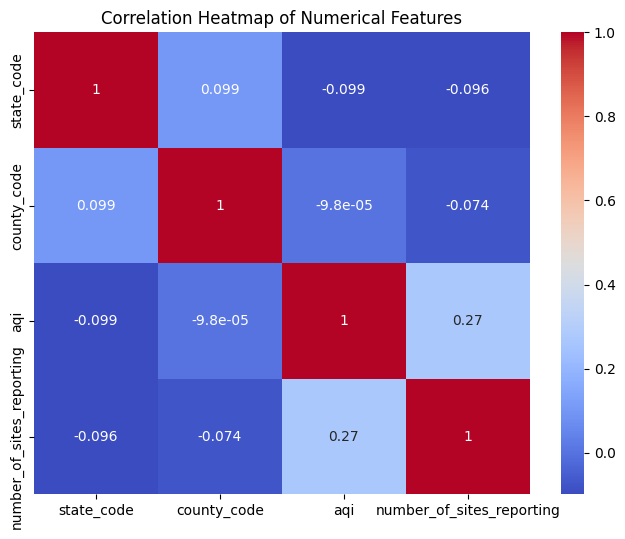

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()